# Perform machine learning on genomic vectors and measurements data using joint fusion architecture

## Read data

### Measurements

In [1]:
import os
from pathlib import Path

import pandas as pd


dataDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '02_data_matrix', 'balanced_data')
dataDirName.mkdir(exist_ok=True, parents=True)

dataDf = pd.read_csv(Path(dataDirName, 'data.csv'))
dataDf = dataDf.sort_values(by=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime'], ascending=True)
dataDf

,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std,Organism_FIRST_NOTED,sepsis,target
0,51211,17422049,2023-02-18,54.000000,54.000000,54.0,54.000000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-04-01,0.0,0.0
1,51211,17422049,2023-02-19,54.000000,54.000000,54.0,54.000000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-04-01,0.0,0.0
2,51211,17422049,2023-02-20,54.000000,54.000000,54.0,54.000000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-04-01,0.0,0.0
3,56089,14164983,2020-12-07,55.285714,39.000000,80.0,48.000000,51.000000,16.948100,79.000000,...,0.070711,0.767143,0.766667,0.767619,0.766667,0.767619,0.014142,2020-12-07,0.0,0.0
4,56089,14164983,2020-12-08,58.285714,34.000000,86.0,34.000000,70.000000,20.171880,70.833333,...,0.070711,0.810000,0.810000,0.810000,0.810000,0.810000,0.014142,2020-12-07,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231552,2662222,17201307,2022-12-30,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,120.880000,...,0.234087,0.910000,0.910000,0.910000,0.910000,0.910000,0.108044,2022-12-21,0.0,0.0
231553,2662222,17201307,2022-12-31,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,129.120000,...,0.183848,1.050000,1.010000,1.090000,1.090000,1.010000,0.056569,2022-12-21,0.0,0.0
231554,2662222,17201307,2023-01-01,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,126.000000,...,0.234087,0.900000,0.900000,0.900000,0.900000,0.900000,0.108044,2022-12-21,0.0,0.0
231555,2662222,17201307,2023-01-02,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,64.400000,...,0.234087,3.500000,3.500000,3.500000,3.500000,3.500000,0.108044,2022-12-21,0.0,0.0


### Vectors

In [2]:
import os
from pathlib import Path

import pandas as pd


vectorsDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_vec')
vectorsTestDf = pd.read_csv(Path(vectorsDir, 'gene_test_vectorised.csv'))
vectorsTestDf.drop(columns=['BLOB_TEXT', 'Unnamed: 0'], inplace=True)
vectorsTrainDf = pd.read_csv(Path(vectorsDir, 'gene_train_vectorised.csv'))
vectorsTrainDf.drop(columns=['BLOB_TEXT', 'Unnamed: 0'], inplace=True)
vectorsValDf = pd.read_csv(Path(vectorsDir, 'gene_val_vectorised.csv'))
vectorsValDf.drop(columns=['BLOB_TEXT', 'Unnamed: 0'], inplace=True)
vectorsDf = pd.concat([vectorsTestDf, vectorsTrainDf, vectorsValDf], ignore_index=True)
vectorsDf

,patient_id,tube_id,vector
0,2092580,AH20L008,"[-0.2532142102718353, -0.12319359928369522, -0..."
1,2097130,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0...."
2,2097130,AH20I027,"[-0.39271822571754456, -0.22921983897686005, -..."
3,2110697,AH21C041,"[-0.2880496084690094, -0.16212013363838196, -0..."
4,2111939,AH19A091,"[-0.5479940176010132, -0.35276076197624207, -0..."
...,...,...,...
134,2185888,AH21B064,"[0.37154945731163025, 0.4720954895019531, 0.73..."
135,2191641,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60..."
136,2195779,AH21A090,"[0.3441142737865448, 0.4080987870693207, 0.657..."
137,634545,AH21A011,"[0.3386542499065399, 0.45146483182907104, 0.68..."


### Tube ID mapping

In [3]:
import os
from pathlib import Path

import pandas as pd


patientTubeidMappingDf = pd.read_csv(Path(os.environ['GENOMICS_DATA_BASE'], 'patient_tube_id_mapping_full.tsv'), sep='\t')
patientTubeidMappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous


### Merge all the information

In [4]:
mergedDf = vectorsDf.merge(
    patientTubeidMappingDf[['tube_code', 'date_of_collection']].drop_duplicates(),
    how='inner',
    left_on=['tube_id'],
    right_on=['tube_code'],
).drop(
    columns=['tube_code']
).merge(
    dataDf,
    how='inner',
    left_on=['patient_id'],
    right_on=['PATIENT_ID']
).drop(
    columns=['patient_id']
)
mergedDf

,tube_id,vector,date_of_collection,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,...,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std,Organism_FIRST_NOTED,sepsis,target
0,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-29,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
1,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-30,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
2,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-31,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
3,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-31,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
4,AH20I027,"[-0.39271822571754456, -0.22921983897686005, -...",2020-09-14,2097130,12971391,2019-10-29,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,AH21B002,"[0.35204654932022095, 0.4347085654735565, 0.68...",2021-02-02,211314,13955099,2021-01-27,70.000,64.0,76.0,73.0,...,0.106066,0.7,0.7,0.7,0.7,0.7,0.074568,2020-10-28,1.0,1.0
7007,AH21B002,"[0.35204654932022095, 0.4347085654735565, 0.68...",2021-02-02,211314,13955099,2021-01-27,70.000,64.0,76.0,73.0,...,0.106066,0.7,0.7,0.7,0.7,0.7,0.074568,2020-10-28,1.0,1.0
7008,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60...",2021-01-16,2191641,14094077,2020-11-11,54.625,48.0,70.0,50.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2021-01-16,0.0,0.0
7009,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60...",2021-01-16,2191641,14094077,2020-11-12,54.625,48.0,70.0,50.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2021-01-16,0.0,0.0


In [5]:
mergedDf['date_of_collection'] = pd.to_datetime(mergedDf['date_of_collection'], format='%Y-%m-%d')
mergedDf['measurement_datetime'] = pd.to_datetime(mergedDf['measurement_datetime'], format='%Y-%m-%d')
mergedDf['Organism_FIRST_NOTED'] = pd.to_datetime(mergedDf['Organism_FIRST_NOTED'], format='%Y-%m-%d')
mergedDf

,tube_id,vector,date_of_collection,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,...,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std,Organism_FIRST_NOTED,sepsis,target
0,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-29,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
1,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-30,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
2,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-31,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
3,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-31,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
4,AH20I027,"[-0.39271822571754456, -0.22921983897686005, -...",2020-09-14,2097130,12971391,2019-10-29,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,AH21B002,"[0.35204654932022095, 0.4347085654735565, 0.68...",2021-02-02,211314,13955099,2021-01-27,70.000,64.0,76.0,73.0,...,0.106066,0.7,0.7,0.7,0.7,0.7,0.074568,2020-10-28,1.0,1.0
7007,AH21B002,"[0.35204654932022095, 0.4347085654735565, 0.68...",2021-02-02,211314,13955099,2021-01-27,70.000,64.0,76.0,73.0,...,0.106066,0.7,0.7,0.7,0.7,0.7,0.074568,2020-10-28,1.0,1.0
7008,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60...",2021-01-16,2191641,14094077,2020-11-11,54.625,48.0,70.0,50.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2021-01-16,0.0,0.0
7009,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60...",2021-01-16,2191641,14094077,2020-11-12,54.625,48.0,70.0,50.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2021-01-16,0.0,0.0


## Prepare data

In [6]:
import ast

import numpy as np


measurementsRowsX = []
vectorsRowsX = []
rowsY = []
for name, group in mergedDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']):
    low = 0
    high = 3
    while high <= group.shape[0]:
        valuesList = []
        for col in mergedDf.columns[~mergedDf.columns.isin(['tube_id', 'vector', 'date_of_collection', 'PATIENT_ID', 'EPISODE_ID', 'measurement_datetime', 'Organism_FIRST_NOTED', 'sepsis', 'target'])]:
        # for col in mergedDf.columns[~mergedDf.columns.isin(['tube_id', 'vector', 'date_of_collection', 'PATIENT_ID', 'EPISODE_ID', 'measurement_datetime', 'Organism_FIRST_NOTED', 'sepsis'])]:
            valuesList.append(list(group[col][low: high]))
        measurementsRowsX.append(
            [[*x] for x in zip(*valuesList)]
            )
        vectors = group['vector'][(high - 1): high]
        vectors = vectors.apply(ast.literal_eval).values[0]
        vectors=np.vstack(vectors).astype(np.float32).flatten()
        vectorsRowsX.append(vectors)
        rowsY.append(group.target[(high - 1): high].values[0])
        high += 1
        low += 1

In [7]:
len(vectorsRowsX), len(measurementsRowsX), len(rowsY)

(6887, 6887, 6887)

In [8]:
import numpy as np


measurementsX = np.array(measurementsRowsX)
vectorsX = np.array(vectorsRowsX)
Y = np.array(rowsY)

In [9]:
measurementsX.shape, vectorsX.shape, Y.shape

((6887, 3, 222), (6887, 300), (6887,))

In [10]:
np.unique(Y, return_counts=True)[1]/Y.shape[0]

array([0.40438507, 0.59561493])

In [11]:
from sklearn.model_selection import train_test_split


measurementsX_train, measurementsX_test, vectorsX_train, vectorsX_test, Y_train, Y_test = train_test_split(measurementsX, vectorsX, Y, test_size=0.2, shuffle=False)

measurementsX_train.shape, measurementsX_test.shape, vectorsX_train.shape, vectorsX_test.shape, Y_train.shape, Y_test.shape

((5509, 3, 222), (1378, 3, 222), (5509, 300), (1378, 300), (5509,), (1378,))

#### Joint Fusion using Neural Networks (LSTM + DNN)

In [12]:
import torch
from torch import nn
import torch.utils.data as data

In [13]:
measurementsX_train_tensor = torch.tensor(measurementsX_train, dtype=torch.float32)
vectorsX_train_tensor = torch.tensor(vectorsX_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)

measurementsX_test_tensor = torch.tensor(measurementsX_test, dtype=torch.float32)
vectorsX_test_tensor = torch.tensor(vectorsX_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

loader = data.DataLoader(data.TensorDataset(measurementsX_train_tensor, vectorsX_train_tensor, Y_train_tensor), shuffle=False, batch_size=1024)

In [14]:
print(measurementsX_train_tensor.shape, vectorsX_train_tensor.shape, Y_train_tensor.shape, measurementsX_test_tensor.shape, vectorsX_test_tensor.shape, Y_test_tensor.shape)

torch.Size([5509, 3, 222]) torch.Size([5509, 300]) torch.Size([5509]) torch.Size([1378, 3, 222]) torch.Size([1378, 300]) torch.Size([1378])


In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [32]:
import torch
import torch.nn as nn


class LstmModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=512):
        super().__init__()
        self.lstm = nn.LSTM(input_size=input_dim, hidden_size=hidden_dim, num_layers=1, batch_first=True)
        self.hidden_dim = hidden_dim

    def forward(self, x):
        x, _ = self.lstm(x)           # (batch, seq_len, hidden_dim)
        x = x[:, -1, :]               # take last hidden state -> (batch, hidden_dim)
        return x                      # return features, not logits


class DnnModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=512):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.linear1 = nn.Linear(input_dim, self.hidden_dim)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(self.hidden_dim, self.hidden_dim)  # keep embeddings, not output

    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))  # feature representation
        return x


class JointFusionModel(nn.Module):
    def __init__(self, lstm_input_dim, dnn_input_dim, hidden_dim=256, num_classes=1):
        super().__init__()
        self.lstm_model = LstmModel(input_dim=lstm_input_dim)
        self.dnn_model = DnnModel(input_dim=dnn_input_dim)

        fusion_input_dim = self.lstm_model.hidden_dim + self.dnn_model.hidden_dim

        # fusion head
        self.fusion = nn.Sequential(
            nn.Linear(fusion_input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_classes)  # regression or classification
        )

    def forward(self, measurementsX, vectorsX):
        lstm_out = self.lstm_model(measurementsX)
        dnn_out = self.dnn_model(vectorsX)
        fused = torch.cat([lstm_out, dnn_out], dim=1)
        out = self.fusion(fused)
        return out


In [33]:
model = JointFusionModel(lstm_input_dim=measurementsX_train_tensor.shape[2], dnn_input_dim=vectorsX_train_tensor.shape[1], num_classes=1).to(device)
model

JointFusionModel(
  (lstm_model): LstmModel(
    (lstm): LSTM(222, 512, batch_first=True)
  )
  (dnn_model): DnnModel(
    (linear1): Linear(in_features=300, out_features=512, bias=True)
    (relu): ReLU()
    (linear2): Linear(in_features=512, out_features=512, bias=True)
  )
  (fusion): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1, bias=True)
  )
)

In [34]:
learning_rate = 0.005

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)
# optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

In [35]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_pred) * 100
    return acc

In [36]:
# Number of epochs
epochs = 200

# Empty loss lists to track values
epoch_count, train_loss_values, valid_loss_values = [], [], []

# Loop through the data
for epoch in range(epochs):

    # Put the model in training mode
    model.train()

    for measurementsX_batch, vectorsX_batch, y_batch in loader:
        y_logits = model(measurementsX=measurementsX_batch, vectorsX=vectorsX_batch).squeeze() # forward pass to get predictions; squeeze the logits into the same shape as the labels
        y_pred = torch.round(torch.sigmoid(y_logits)) # convert logits into prediction probabilities

        loss = loss_fn(y_logits, y_batch) # compute the loss
        acc = accuracy_fn(y_batch.int(), y_pred) # calculate the accuracy; convert the labels to integers

        optimizer.zero_grad() # reset the gradients so they don't accumulate each iteration
        loss.backward() # backward pass: backpropagate the prediction loss
        optimizer.step() # gradient descent: adjust the parameters by the gradients collected in the backward pass

    # Print progress a total of 20 times
    if epoch % int(epochs / 20) == 0:
        # Put the model in evaluation mode
        model.eval()

        with torch.inference_mode():
            y_logits = model(measurementsX=measurementsX_train_tensor, vectorsX=vectorsX_train_tensor).squeeze()
            y_pred = torch.round(torch.sigmoid(y_logits)) # convert logits into prediction probabilities

            loss = loss_fn(y_logits, Y_train_tensor) # compute the loss
            acc = accuracy_fn(Y_train_tensor.int(), y_pred) # calculate the accuracy; convert the labels to integers

            valid_logits = model(measurementsX=measurementsX_test_tensor, vectorsX=vectorsX_test_tensor).squeeze()
            valid_pred = torch.round(torch.sigmoid(valid_logits))

            valid_loss = loss_fn(valid_logits, Y_test_tensor)
            valid_acc = accuracy_fn(Y_test_tensor.int(), valid_pred)
        
        print(f'Epoch: {epoch:4.0f} | Train Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Validation Loss: {valid_loss:.5f}, Accuracy: {valid_acc:.2f}%')

        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        valid_loss_values.append(valid_loss.detach().numpy())

Epoch:    0 | Train Loss: 0.67134, Accuracy: 82.10% | Validation Loss: 0.69174, Accuracy: 50.07%
Epoch:   10 | Train Loss: 0.58555, Accuracy: 69.18% | Validation Loss: 0.76912, Accuracy: 33.24%
Epoch:   20 | Train Loss: 0.53457, Accuracy: 70.56% | Validation Loss: 0.80855, Accuracy: 33.02%
Epoch:   30 | Train Loss: 0.49322, Accuracy: 75.28% | Validation Loss: 0.81498, Accuracy: 35.70%
Epoch:   40 | Train Loss: 0.45597, Accuracy: 79.02% | Validation Loss: 0.86230, Accuracy: 33.96%
Epoch:   50 | Train Loss: 0.42394, Accuracy: 83.59% | Validation Loss: 0.84923, Accuracy: 37.37%
Epoch:   60 | Train Loss: 0.38707, Accuracy: 85.08% | Validation Loss: 0.90941, Accuracy: 37.81%
Epoch:   70 | Train Loss: 0.35966, Accuracy: 86.68% | Validation Loss: 0.89229, Accuracy: 36.43%
Epoch:   80 | Train Loss: 0.33658, Accuracy: 87.24% | Validation Loss: 0.94491, Accuracy: 36.43%
Epoch:   90 | Train Loss: 0.32528, Accuracy: 87.22% | Validation Loss: 0.97031, Accuracy: 37.08%
Epoch:  100 | Train Loss: 0.30

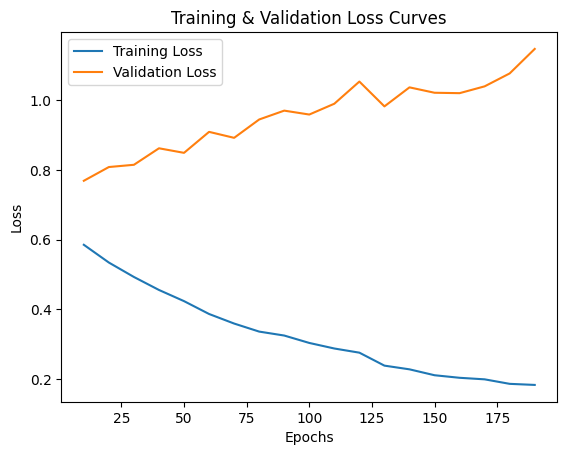

In [37]:
from matplotlib import pyplot as plt


plt.plot(epoch_count[1:], train_loss_values[1:], label='Training Loss')
plt.plot(epoch_count[1:], valid_loss_values[1:], label='Validation Loss')
plt.title('Training & Validation Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [38]:
import torch

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score


y_logits = model(measurementsX=measurementsX_test_tensor, vectorsX=vectorsX_test_tensor).squeeze() # forward pass to get predictions; squeeze the logits into the same shape as the labels
y_pred = torch.round(torch.sigmoid(y_logits)).detach().numpy() # convert logits into prediction probabilities
y_score = y_logits.detach().numpy()

print('Accuracy', accuracy_score(Y_test, y_pred))
print('Balanced Accuracy', balanced_accuracy_score(Y_test, y_pred))
print('F1 Score', f1_score(Y_test, y_pred))
print('Precision Score', precision_score(Y_test, y_pred))
print('Recall Score', recall_score(Y_test, y_pred))
print('roc_auc_score', roc_auc_score(Y_test, y_score))

Accuracy 0.4027576197387518
Balanced Accuracy 0.5028289348775394
F1 Score 0.4714193962748876
Precision Score 0.33393994540491356
Recall Score 0.8013100436681223
roc_auc_score 0.599767419783558


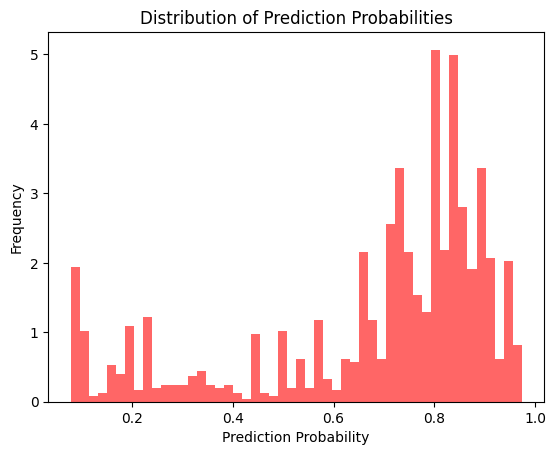

In [39]:
y_logits = model(measurementsX=measurementsX_test_tensor, vectorsX=vectorsX_test_tensor).squeeze() # forward pass to get predictions; squeeze the logits into the same shape as the labels
    # y_pred = torch.round(torch.sigmoid(y_logits)) # convert logits into prediction probabilities
# Create the histogram
# plt.hist(y_logits.detach().numpy(), bins=50, density=True, alpha=0.6, color='g')
plt.hist(torch.sigmoid(y_logits).detach().numpy(), bins=50, density=True, alpha=0.6, color='r')

# Add labels and title
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Probabilities')

# Display the plot
plt.show()